# Оптическое определение никеля

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, tstd
import seaborn as sns
import mplcursors

In [11]:
float_formatter = "{:.2f}".format
def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B
def f_1(Y, A, B):
    '''
    Y = AX + B
    Thus
    X = ( Y - B ) / A
    '''
    return (Y - B) / A

## Калибровка

In [12]:
c_std = 0.0989 #Ni, mg/ml 
c_cr = 0.100
V_flask = 100.00 #ml
V_cal = np.array([ 2., 4.,  6.05,  8.1, 10., 12.]) #ml
c_cal = V_cal * c_std / V_flask
V_cr = V_cal*1.5

### Недифференциальная

In [13]:
l_cal = 0.2 #Cuvette length cm
A_cal = np.array([ 0.046, 0.138, 0.242, 0.347, 0.439, 0.533]) # Optical density

In [14]:
slope_cal, intercept_cal = linregress(c_cal, A_cal)[0], linregress(c_cal, A_cal)[1]

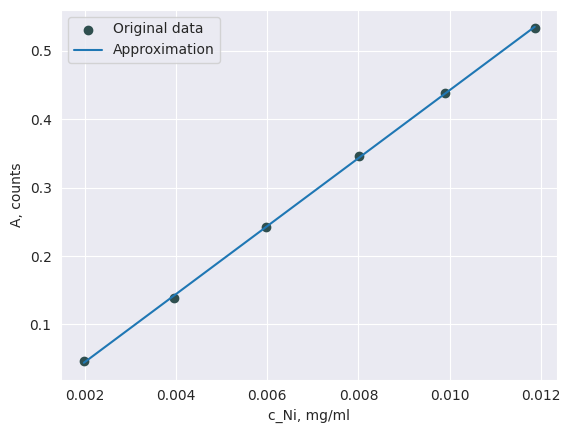

In [15]:
sns.set_style('darkgrid')
plt.scatter(c_cal, A_cal,label="Original data", color="darkslategray")
c_cal_fine = np.linspace(np.min(c_cal), np.max(c_cal), 100)
plt.plot(c_cal_fine, f(c_cal_fine, slope_cal, intercept_cal), label="Approximation")
plt.xlabel("c_Ni, mg/ml")
plt.ylabel("A, counts")
mplcursors.cursor()
plt.legend()
plt.show()

### Дифференциальная

In [16]:
l_dif_cal = 0.5
c_dif_cal = np.array([0., 0.001978  , 0.003956  , 0.0080109 , 0.00989   ,
       0.011868  ])
A_dif_cal = np.array([-0.641, -0.485, -0.251, 0.262, 0.497, 0.702]) # Needed if no baseline
#A_0_dif = A_dif[3]
#A_dif = A_dif - A_0_dif

In [17]:
slope_dif_cal, intercept_dif_cal = linregress(c_dif_cal, A_dif_cal)[0], linregress(c_dif_cal, A_dif_cal)[1]

Text(0, 0.5, 'A, counts')

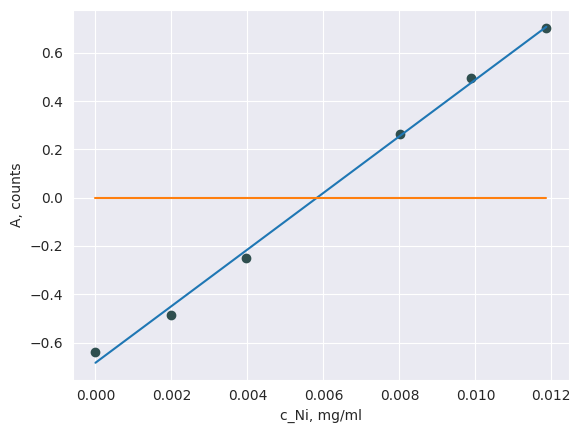

In [18]:
plt.scatter(c_dif_cal, A_dif_cal, color="darkslategray")
c_dif_cal_fine = np.linspace(np.min(c_dif_cal), np.max(c_dif_cal), 100)
plt.plot(c_dif_cal_fine, f(c_dif_cal_fine, slope_dif_cal, intercept_dif_cal))
plt.plot(c_dif_cal_fine, [0 for i in range(len(c_dif_cal_fine))])
plt.xlabel("c_Ni, mg/ml")
plt.ylabel("A, counts")

## Определение

### Недифференциальное

In [19]:
m_steel_1 = np.float64(0.18189 - 0.13448)
m_steel_2 = np.float64(0.18305 - 0.13459)
V_aliq_1 = 20.00

In [20]:
A_1 = np.float64(0.384)
A_2 = np.float64(0.382)

Массовая доля никеля в первой пробе обычным методом

In [21]:
print(float_formatter(f_1(A_1, slope_cal,
                    intercept_cal)*V_flask/V_aliq_1*V_flask/(m_steel_1*1000)*100)+'%')

9.30%


Массовая доля никеля во второй пробе дифференциальным методом

In [22]:
print(float_formatter(f_1(A_2, slope_cal,
                    intercept_cal)*V_flask/V_aliq_1*V_flask/(m_steel_2*1000)*100)+'%')

9.06%


### Дифференциальное

In [23]:
A_1_dif = np.float64(0.375)
A_2_dif = np.float64(0.399)

Массовая доля никеля в первой пробе дифференциальным методом

In [24]:
print(float_formatter(f_1(A_1_dif, slope_dif_cal,
                    intercept_dif_cal)*V_flask/V_aliq_1*V_flask/(m_steel_1*1000)*100)+'%')

9.52%


Массовая доля никеля во второй пробе дифференциальным методом

In [25]:
print(float_formatter((f_1(A_2_dif, slope_dif_cal,
                     intercept_dif_cal)*V_flask/V_aliq_1*V_flask/(m_steel_2*1000)*100))+'%')

9.53%
